# CNN(Convolutional Neural Network)
- Used framework: tensorflow

In [29]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import datasets

%matplotlib inline

## Prepare NMIST dataset

In [14]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

## Build Model

In [20]:
# Feature Extraction
inputs = layers.Input((28, 28, 1))
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

# Classification
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

## Loss Function
- Cross Entropy 사용, 굳이 One-Hot Encoding 으로 전처리하지 않고 sparse_categorical_crossentropy 사용

In [4]:
loss_fun = tf.keras.losses.sparse_categorical_crossentropy

## Metrics

In [5]:
metrics = ['accuracy']

## Optimizer

In [6]:
optm = tf.keras.optimizers.Adam()

In [22]:
model.compile(optimizer=optm, loss=loss_fun, metrics=metrics)

## Prepare Dataset

In [15]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### Rescaling

In [17]:
np.min(X_train), np.max(X_test), np.min(X_test), np.max(X_test)

(0, 255, 0, 255)

In [18]:
X_train = X_train / 255
X_test = X_test / 255
np.min(X_train), np.max(X_test)

(0.0, 1.0)

## Training

In [24]:
num_epochs = 5
batch_size = 32

In [25]:
model.fit(X_train, y_train, batch_size=batch_size, shuffle=True, epochs=num_epochs)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 304s 5ms/sample - loss: 0.1039 - accuracy: 0.9684
Epoch 2/5
60000/60000 [==============================] - 304s 5ms/sample - loss: 0.0536 - accuracy: 0.9834
Epoch 3/5
60000/60000 [==============================] - 298s 5ms/sample - loss: 0.0400 - accuracy: 0.9875
Epoch 4/5
60000/60000 [==============================] - 295s 5ms/sample - loss: 0.0310 - accuracy: 0.9904
Epoch 5/5
60000/60000 [==============================] - 286s 5ms/sample - loss: 0.0249 - accuracy: 0.9921


## Evaluating

In [27]:
model.evaluate(X_test, y_test, batch_size=batch_size)

10000/10000 [==============================] - 21s 2ms/sample - loss: 0.0277 - accuracy: 0.9913


[0.027673381332148618, 0.9913]

## Result

In [30]:
test_image = X_test[0, :, :, 0]
test_image.shape

(28, 28)

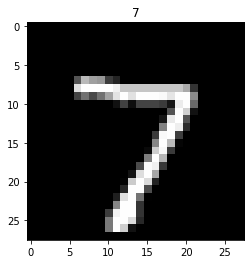

In [31]:
plt.title(y_test[0])
plt.imshow(test_image, 'gray')
plt.show()

In [32]:
pred = model.predict(test_image.reshape(1, 28, 28, 1))
pred.shape

(1, 10)

In [33]:
pred

array([[1.2397837e-12, 5.7976274e-10, 1.7834591e-10, 8.5500867e-10,
        4.1451780e-11, 5.4178249e-13, 7.9249038e-17, 1.0000000e+00,
        7.7717406e-13, 1.2491114e-09]], dtype=float32)

In [34]:
np.argmax(pred)

7

In [50]:
test_batch = X_test[: 5000]
test_batch.shape

(5000, 28, 28, 1)

In [51]:
preds = model.predict(test_batch)
preds.shape

(5000, 10)

In [54]:
predictions = np.argmax(preds, -1)
answer = y_test[: 5000]

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(answer, predictions)

0.9874

### 5000개의 test data를 예측해 본 결과 accuracy score 가 0.9874 가 나와 약 4937개의 data 에 대한 예측이 맞았음을 확인할 수 있다